# DSCI 4780 Final Project

## Problem:
The objective of this project is to analyze a dataset of traffic accidents in Atlanta and identify the most influential factors affecting accident severity. By understanding these factors, we can develop targeted interventions and recommendations to improve road safety and reduce the impact of accidents in the city.

In this project, we utilize machine learning techniques, including feature selection and multiple model evaluation, to identify the top factors contributing to accident severity. We then conduct a comprehensive analysis of these factors using various visualization techniques to understand their relationships with accident severity. Based on our findings, we propose data-driven strategies to address the identified factors and ultimately reduce the severity of traffic accidents in Atlanta.

## Dataset: 
The dataset we will use to analyze this problem is the Atlanta Roads Crash Data by Joshua Truman from Kaggle. We use a CSV file name traffic  "traffic_accidents_atlanta.csv" that contains information such as location, time, weather conditions, severity, and other relevant factors about traffic accidents in Atlanta. 
https://www.kaggle.com/datasets/jtambunan/atlanta-roads-crash-data

## Step 1: Loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import math

Atl_data = pd.read_csv("traffic_accidents_atlanta.csv")

#dropping rows that contain Atlanta but are not from Georgia, USA
Atl_data.drop(Atl_data[Atl_data['State'] != 'GA'].index, inplace = True)

#dropping the 'Number column' due to dataset author request
Atl_data.drop(columns = ['Number'], inplace = True)

                         
#dropping unnamed column in the dataset that we have no information about
Atl_data = Atl_data.drop("Unnamed: 0", axis = 1)
                         
                         
#target variable for our project
print(Atl_data['Severity'].unique())

print(Atl_data.head())

[2 3 4 1]
          ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2749196         2  2016-11-30 17:39:56  2016-11-30 23:39:56  33.741530   
1  A-2749218         2  2016-11-30 18:09:52  2016-12-01 00:09:52  33.912200   
2  A-2749233         2  2016-11-30 18:44:53  2016-12-01 00:44:53  33.927360   
3  A-2749242         2  2016-11-30 18:56:16  2016-12-01 00:56:16  33.741360   
4  A-2749273         2  2016-11-30 20:52:19  2016-12-01 02:52:19  33.759168   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0 -84.414340  33.74658 -84.43034         0.983   
1 -84.383900  33.91138 -84.37258         0.652   
2 -84.357740  33.98695 -84.33940         4.249   
3 -84.414020  33.74119 -84.41173         0.132   
4 -84.378729  33.76159 -84.38080         0.205   

                                         Description  ... Roundabout Station  \
0  Between Ashby St/Exit 55 and Langhorn St/Exit ...  ...      False   False   
1            At US-19/Roswell Rd/Exit 25 - Accident.  

## Step 2: Data Preprocessing and Exploration

In [2]:
# Calculate the statistical summary using the describe() method
stat_summary = Atl_data.describe()

num_columns = Atl_data.select_dtypes(include=np.number).columns

# Calculate the statistical summary for numeric features
numeric_summary = Atl_data[num_columns].describe()
numeric_summary.loc['missing_values'] = Atl_data[num_columns].isna().sum()
numeric_summary.loc['data_types'] = Atl_data[num_columns].dtypes.astype(str)
numeric_summary.loc['unique_values'] = Atl_data[num_columns].nunique()

# Transpose the DataFrames
numeric_data_quality_report = numeric_summary.T
# Export the data quality reports to CSV files
numeric_data_quality_report.to_csv('numeric_data_quality_report.csv', index=True)

# Display the data quality reports
print("Numeric Data Quality Report:")
print(numeric_data_quality_report)

Numeric Data Quality Report:
                     count       mean        std        min        25%  \
Severity           11845.0    2.48932   0.718707        1.0        2.0   
Start_Lat          11845.0  33.783714   0.093175  33.569125   33.72029   
Start_Lng          11845.0 -84.396131   0.071702 -84.654387  -84.44997   
End_Lat            11845.0   33.78395   0.093083   33.56302  33.725929   
End_Lng            11845.0 -84.395766   0.072505  -84.64015 -84.450518   
Distance(mi)       11845.0   0.566245   0.677017        0.0      0.165   
Temperature(F)     11811.0  62.528245  15.504473       11.7       51.1   
Wind_Chill(F)       6559.0  57.965467  18.278552       -3.0       42.0   
Humidity(%)        11795.0  71.217974  21.155173       11.0       54.0   
Pressure(in)       11819.0  29.572059   0.553523      28.32      29.03   
Visibility(mi)     11810.0   8.926455    2.41001        0.1       10.0   
Wind_Speed(mph)    10708.0   7.282013   4.703723        0.0        4.6   
Precipita

In [3]:
# Identify categorical
cat_columns = Atl_data.select_dtypes(include='object').columns

cat_summary = pd.DataFrame(index=['missing_values', 'data_types', 'unique_values', 'mode', 'count', 'mode_frequency', 'mode_percentage'], columns=cat_columns)
cat_summary.loc['missing_values'] = Atl_data[cat_columns].isna().sum()
cat_summary.loc['data_types'] = Atl_data[cat_columns].dtypes.astype(str)
cat_summary.loc['unique_values'] = Atl_data[cat_columns].nunique()
cat_summary.loc['mode'] = Atl_data[cat_columns].mode().iloc[0]
cat_summary.loc['count'] = Atl_data[cat_columns].apply(lambda x: x.value_counts().iloc[0])
cat_summary.loc['mode_frequency'] = Atl_data[cat_columns].apply(lambda x: x.value_counts().max())
cat_summary.loc['mode_percentage'] = (Atl_data[cat_columns].apply(lambda x: x.value_counts().max()) / len(Atl_data)) * 100

# Transpose the DataFrames
categorical_data_quality_report = cat_summary.T

# Export the data quality reports to CSV files
categorical_data_quality_report.to_csv('categorical_data_quality_report.csv', index=True)

# Display the data quality reports
print("\nCategorical Data Quality Report:")
print(categorical_data_quality_report)


Categorical Data Quality Report:
                      missing_values data_types unique_values  \
ID                                 0     object         11845   
Start_Time                         0     object          9234   
End_Time                           0     object          9510   
Description                        0     object          4245   
Street                             0     object           359   
Side                               0     object             2   
City                               0     object             1   
County                             0     object             5   
State                              0     object             1   
Zipcode                            0     object           321   
Country                            0     object             1   
Timezone                           0     object             1   
Airport_Code                       0     object             4   
Weather_Timestamp                 25     object         

### Handling Missing Values

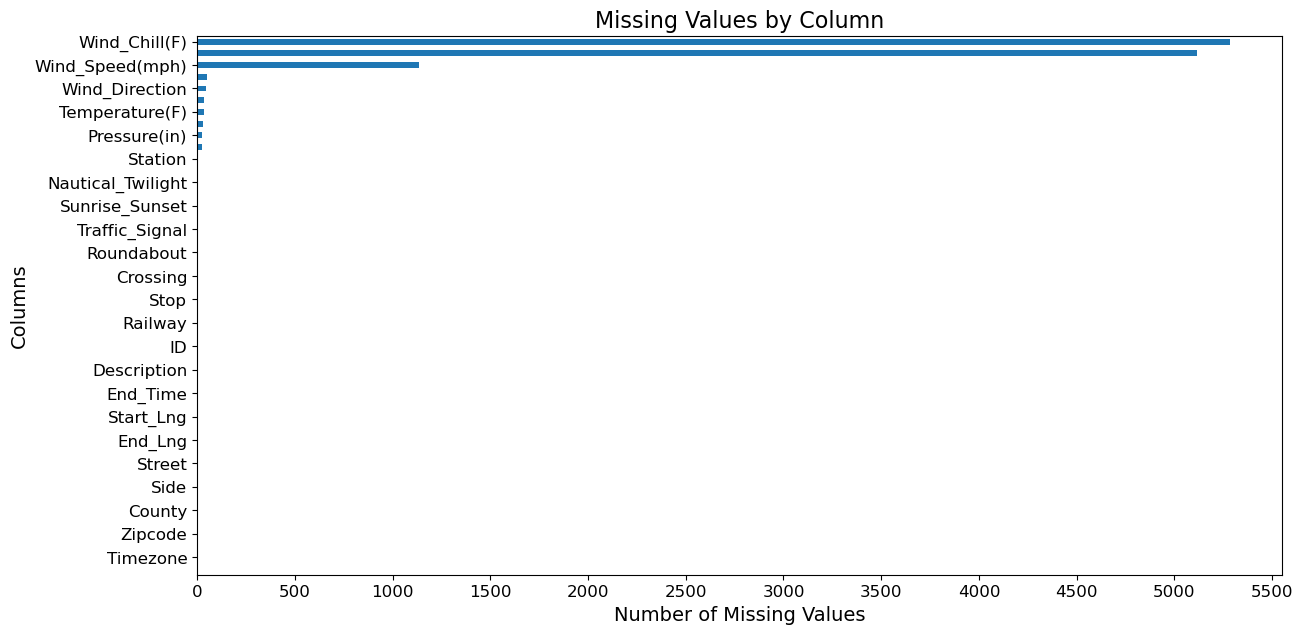

In [4]:
missing_values = Atl_data.isna().sum()
m_values_sorted = missing_values.sort_values(ascending=False)
plt.figure(figsize=(14, 7))
m_values_sorted.plot(kind='barh')

# Set the title, xlabel, and ylabel with a larger font size
plt.title('Missing Values by Column', fontsize=16)
plt.xlabel('Number of Missing Values', fontsize=14)
plt.ylabel('Columns', fontsize=14)

# Define the step between the ticks
step = 500

# Set the new x-axis ticks with more ticks
plt.xticks(np.arange(0, m_values_sorted.max() + step, step), fontsize=12)

# Get the current y-axis tick locations and labels
yticks_locs, yticks_labels = plt.yticks()

# Define the step between the ticks
step = 2

# Set the new y-axis ticks with a larger gap
plt.yticks(np.arange(0, len(yticks_labels), step), yticks_labels[::step], fontsize=12)
plt.gca().invert_yaxis()
plt.show()

We applied imputation strategies for numerical and categorical features when handling missing values. Mean imputation was used for the numerical features, and mode imputation was used for categorical features.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


#handling missing values using mean for numerical columns/features
numeric_features = Atl_data.select_dtypes(include = np.number).columns
impute_mean = SimpleImputer(strategy = 'mean')
Atl_data_numeric = pd.DataFrame(impute_mean.fit_transform(Atl_data[numeric_features]), columns = numeric_features)


#handling missing values using mode for categorical columns/features
categorical_features = Atl_data.select_dtypes(include = 'object').columns
impute_mode = SimpleImputer(strategy = 'most_frequent')
Atl_data_categorical = pd.DataFrame(impute_mode.fit_transform(Atl_data[categorical_features]), columns = categorical_features)


#one-hot encoding for categorical features.... RF classifier expects numeric input, but our dataset still contains categorical features... we need to convert the categorical features into numeric form using one-hot encoding
Atl_data_categorical_encoded = pd.get_dummies(Atl_data_categorical)


#Combining the imputed numeric and (imputed and encoded) categorical data
Atl_data_combined = pd.concat([Atl_data_numeric, Atl_data_categorical_encoded], axis = 1)

### Handling Outliers
Outliers were determined in the dataset by using the Interquartile Range Method. The IQR is the range between the first quartile, the 25th percentile, and the third quartile, the 75th percentile. The outliers are data points that fall below the first quartile minus 1.5IQR or above the third quartile plus 1.5IQR. This process ensures that the remaining data points are more accurate to the overall distribution. 

In [6]:
#handling outliers using IQR for numeric columns/features
Q1 = Atl_data_combined.quantile(0.25)
Q3 = Atl_data_combined.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#removing the outliers
Atl_data_n = Atl_data_combined[(Atl_data_combined >= lower_bound) & (Atl_data_combined <= upper_bound)]

Using boxplots to visualize the before and after of removing outliers for numerical features

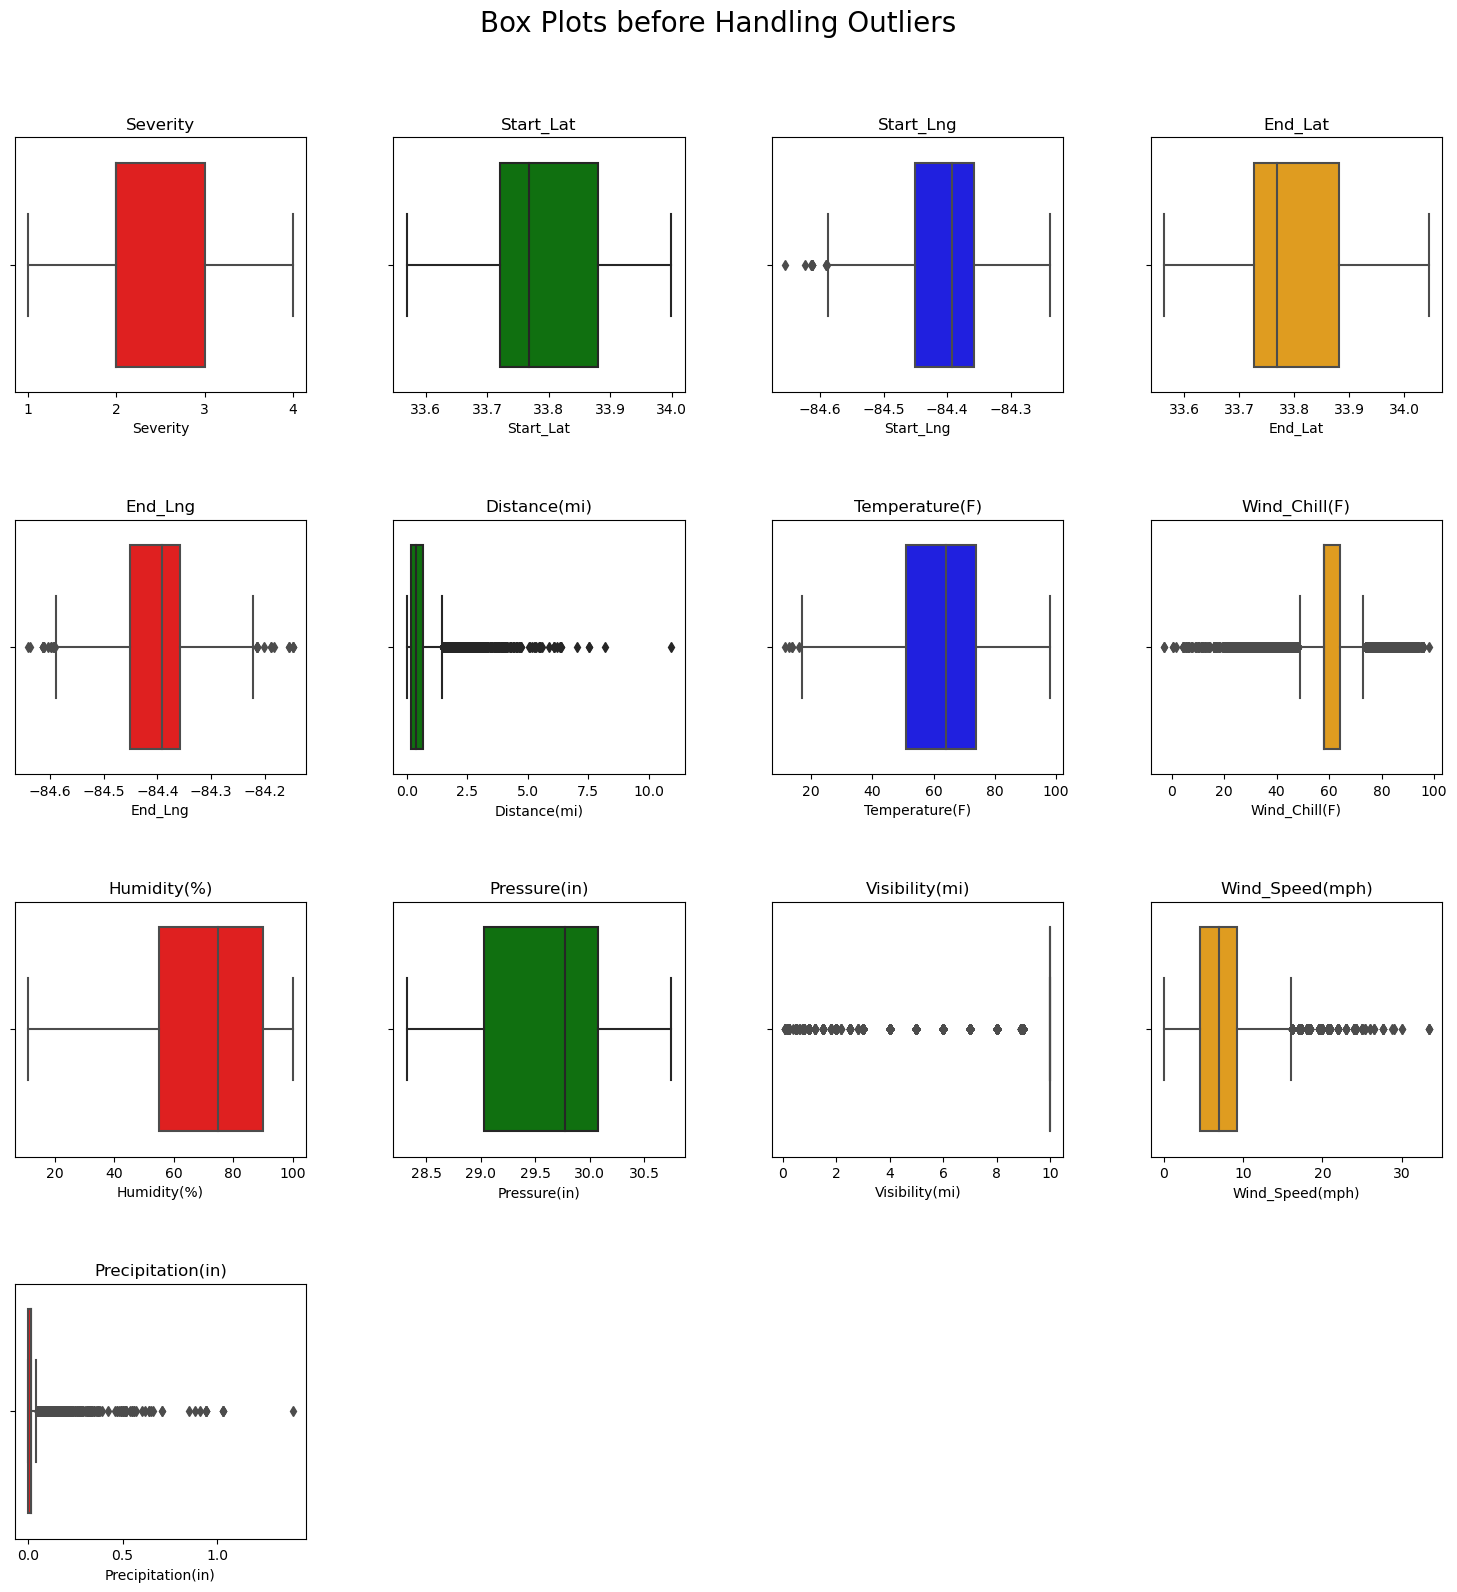

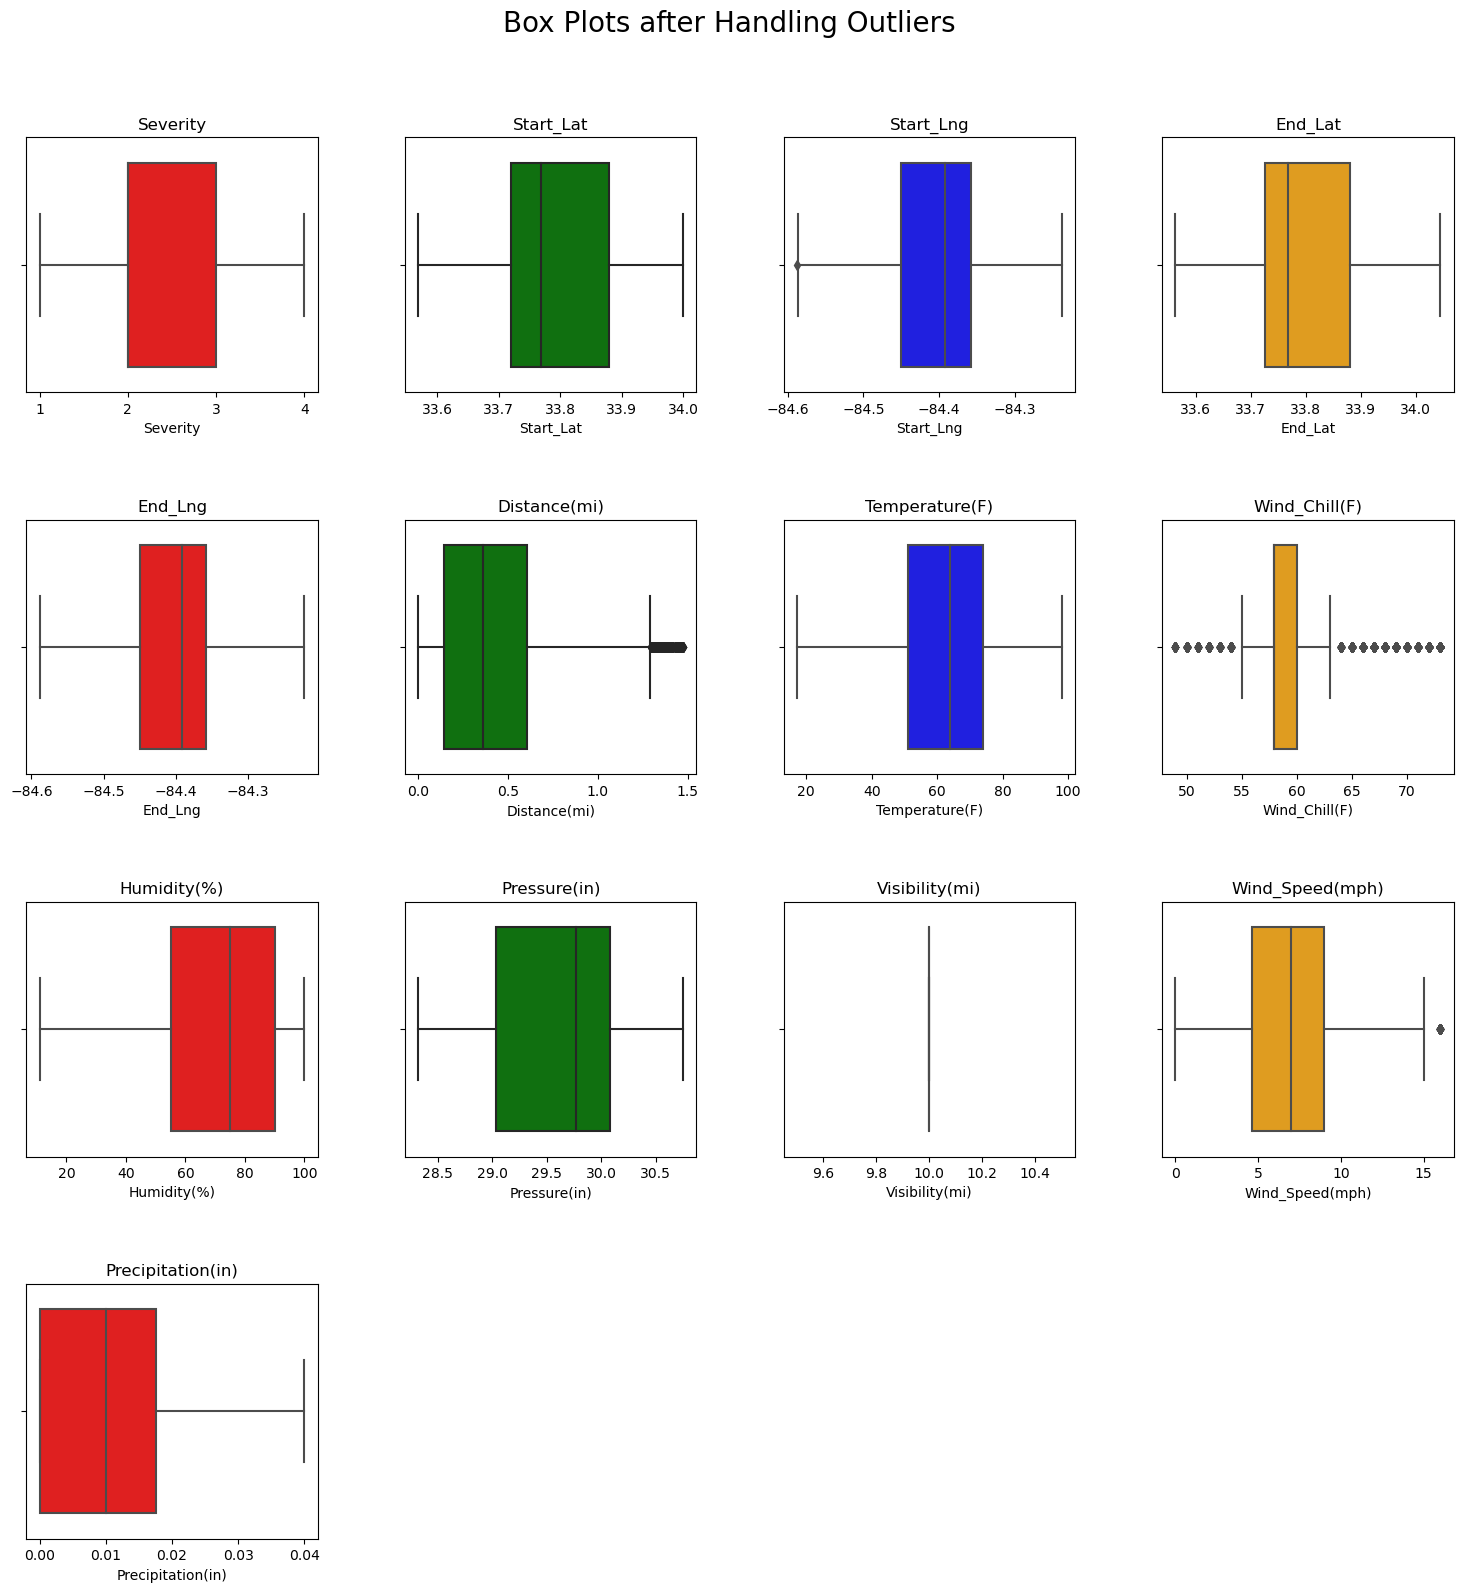

In [7]:
# Function to create box plots for a given set of features
def plot_box_plots(data, features, plot_title, num_cols=4, box_colors=None, filename=None):
    num_features = len(features)
    num_rows = math.ceil(num_features / num_cols)

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 4))
    fig.tight_layout()
    fig.subplots_adjust(top=0.9, wspace=0.3, hspace=0.5)  # Increase wspace and hspace
    fig.suptitle(plot_title, fontsize=20)

    for i, feature in enumerate(features):
        row, col = divmod(i, num_cols)
        if num_rows == 1:
            ax = axes[col]
        else:
            ax = axes[row, col]
        
        if box_colors is None:
            color = 'blue'  # Default color
        else:
            color = box_colors[i % len(box_colors)]  # Cycle through the provided colors

        sns.boxplot(x=data[feature], ax=ax, color=color)
        ax.set_title(feature)

    # Remove unused subplots
    for j in range(i+1, num_rows * num_cols):
        row, col = divmod(j, num_cols)
        fig.delaxes(axes[row, col])
    
    # Save the figure to a file if filename is provided
    if filename is not None:
        fig.savefig(filename)


# Example usage
colors = ['red', 'green', 'blue', 'orange']

# Box plot before handling outliers
plot_box_plots(Atl_data_combined, numeric_features, "Box Plots before Handling Outliers", box_colors=colors, filename='boxplot_before.png')

# Box plot after handling outliers
plot_box_plots(Atl_data_n, numeric_features, "Box Plots after Handling Outliers", box_colors=colors, filename='boxplot_after.png')

## Normalization
Regarding normalization, we focused on the numerical features that need normalization. The Min-Max Scaling normalization technique was utilized to normalize this dataset. This method scales the values of features to a range typically [0,1] by performing the formula (x - min)/(max-min). Normalizing the dataset ensures that all features contribute equally to the model, stopping any feature from dominating the data training process.

In [8]:
#Normalizing numeric columns/features (excluding the target variable 'Severity') data using range normalization (MinMaxScaler)
Normalizing_Features = Atl_data_n.drop('Severity', axis = 1).columns
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(Atl_data_n[Normalizing_Features]), columns = Normalizing_Features)


#combining normalized features with the original 'Severity' column
normalized_Atl_data = pd.concat([Atl_data_n['Severity'], normalized_features], axis = 1)


#Replacing NaN or infinite values with the mean of the column
normalized_Atl_data = normalized_Atl_data.apply(lambda x: x.replace([np.inf, -np.inf], np.nan))
normalized_Atl_data.fillna(normalized_Atl_data.mean(), inplace = True)

Using histograms to show a before and after normalization on a subset of normalized features

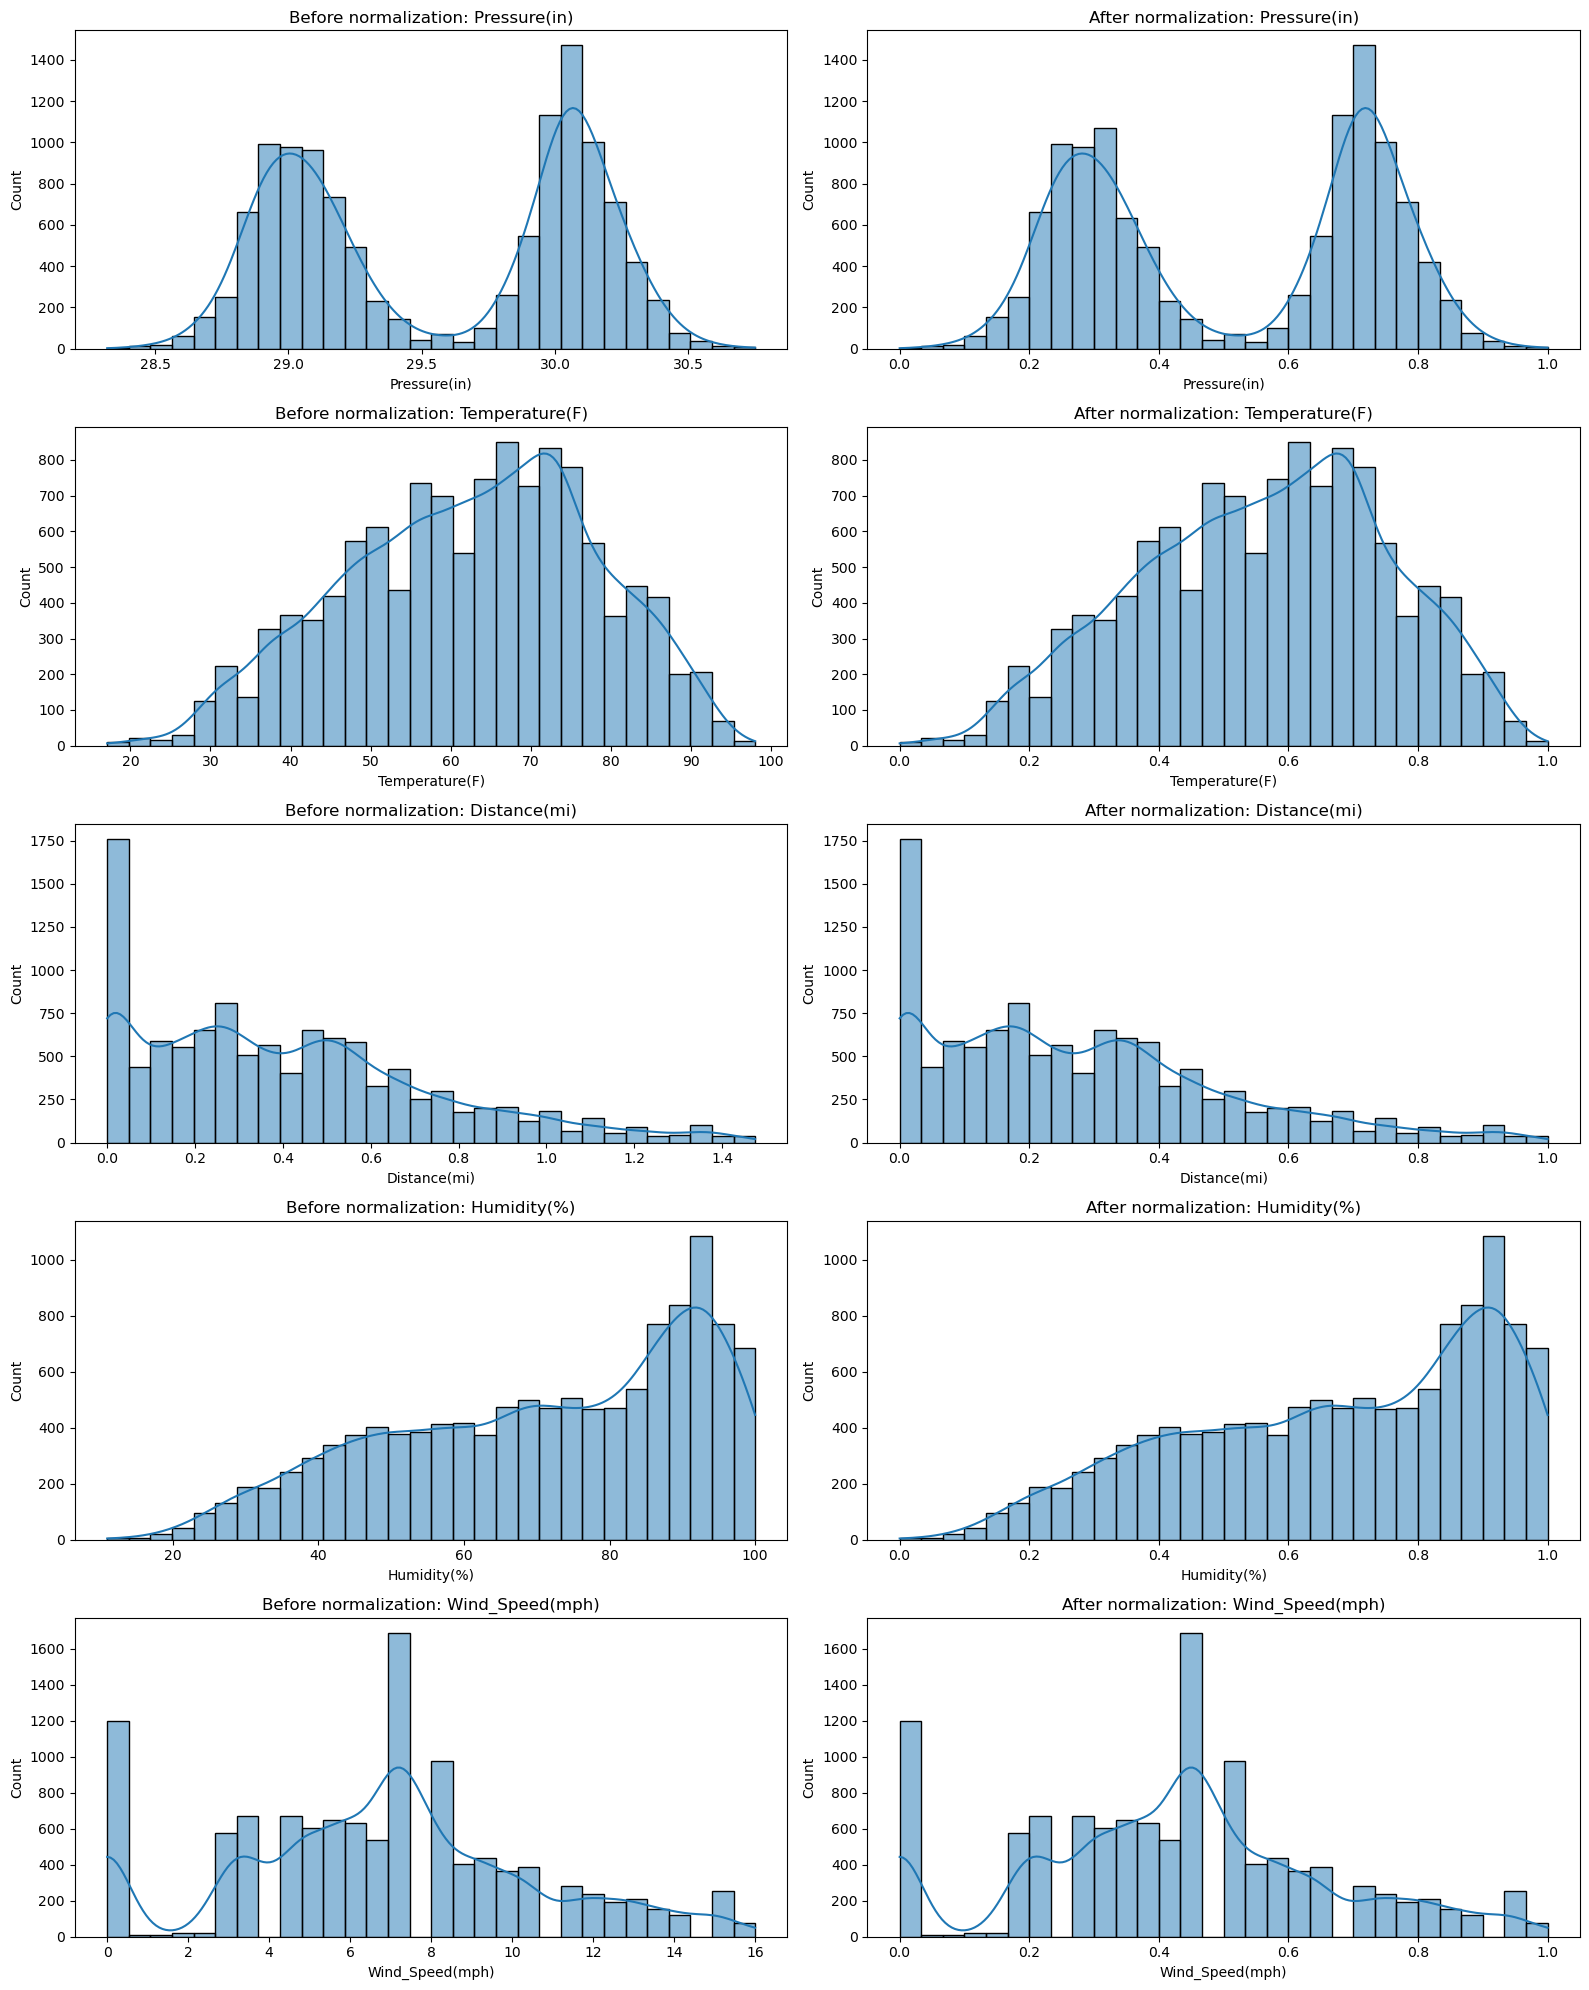

In [9]:
# Selecting a few numeric features for better visualization
sample_numeric_features = ['Pressure(in)', 'Temperature(F)', 'Distance(mi)', 'Humidity(%)', 'Wind_Speed(mph)']

# Creating a new DataFrame with selected features before normalization
original_data_sample = Atl_data_n[sample_numeric_features]

# Creating a new DataFrame with selected features after normalization
normalized_data_sample = normalized_features[sample_numeric_features]

fig, axes = plt.subplots(nrows=len(sample_numeric_features), ncols=2, figsize=(16, 4 * len(sample_numeric_features)))

for idx, feature in enumerate(sample_numeric_features):
    # Before normalization
    sns.histplot(data=original_data_sample, x=feature, kde=True, ax=axes[idx, 0], bins=30)
    axes[idx, 0].set_title(f'Before normalization: {feature}')

    # After normalization
    sns.histplot(data=normalized_data_sample, x=feature, kde=True, ax=axes[idx, 1], bins=30)
    axes[idx, 1].set_title(f'After normalization: {feature}')

plt.tight_layout()
plt.savefig("sampling before_and_after_normalization.png")
plt.show()

In [ ]:
#Feature selection using Random Forest
#target feature is 'Severity', it represents the severity of the accident based on 4 classes (1, 2, 3, 4) where 1 is the low severity and 4 is the highest severity
X = normalized_Atl_data.drop('Severity', axis = 1)
y = normalized_Atl_data['Severity']


#intializing the random forest model
rf_model = RandomForestClassifier(random_state = 42)

#train the random forest model
rf_model.fit(X, y)

#get the importance of features
feature_importances = pd.Series(rf_model.feature_importances_, index = X.columns)


#select the most important features
selected_features = feature_importances[feature_importances > 0.01]
columns_selection = selected_features.index

X_selected = X[columns_selection]

## Step 3: Model Training
Each model is trained with 70% of the data and 30% for testing. This means that the training set will be used to train the models, while the testing set will be used to evaluate their performance

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3, random_state = 42)

#addressing NaN or infinity values in the training data
if X_train.isnull().sum().sum() > 0:
    X_train.fillna(X_train.mean(), inplace = True)

if y_train.isnull().sum() > 0:
    y_train.fillna(y_train.mode()[0], inplace = True)
    

#Intialize the models (gradient boosting classifier, random forest classifier, and logistic regression model)
logistic_reg_model = LogisticRegression(solver = 'lbfgs', max_iter = 1000, random_state = 42)
Gradient_Boo_model = GradientBoostingClassifier(random_state = 42)
Random_For_model = RandomForestClassifier(random_state = 42)


#standardize the data
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)



#addressing Nan or infinity values in the test data
if np.isnan(X_test_std).sum() > 0:
    X_test_std[np.isnan(X_test_std)] = np.nanmean(X_test_std)

X_test_std = np.nan_to_num(X_test_std, nan = 0.0, posinf = None, neginf = None)
    
    
#Training the models
logistic_reg_model.fit(X_train_std, y_train)
Gradient_Boo_model.fit(X_train_std, y_train)
Random_For_model.fit(X_train_std, y_train)

## Step 4: Model Evaluation
Logistic Regression, Gradient Boosting Classifier, and Random Forest Classifier are the models we use for evaluation. These models take in the preprocessed and selected features as input and output predictions for the target variable of “severity.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#making prediction using the models
logistic_reg_preds = logistic_reg_model.predict(X_test_std)
Gradient_Boo_preds = Gradient_Boo_model.predict(X_test_std)
Random_For_preds = Random_For_model.predict(X_test_std)


#calculating accuracy for each model
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_preds)
Gradient_Boo_accuracy = accuracy_score(y_test, Gradient_Boo_preds)
Random_For_accuracy = accuracy_score(y_test, Random_For_preds)

In [ ]:
#printing accuracy for each model
print("Logistic Regression Accuracy: ", logistic_reg_accuracy)
print("Gradient Boosting Classifier Accuracy: ", Gradient_Boo_accuracy)
print("Random Forest Classifier Accuracy: ", Random_For_accuracy)

In [ ]:
#printing classification reports
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_reg_preds, zero_division = 1))
print("\nGradient Boosting Classifier Classification Report:\n", classification_report(y_test, Gradient_Boo_preds, zero_division = 1))
print("\nRandom Forest Classifier Classification Report:\n", classification_report(y_test, Random_For_preds, zero_division = 1))

In [ ]:
#function for plotting confusion matrices for better visualization
def plot_cm(confusion_m, model):
    plt.figure(figsize = (8, 6))
    sns.heatmap(confusion_m, annot = True, fmt = 'd', cmap = 'Blues', annot_kws = {"size": 14})
    plt.title(f'{model} Confusion Matrix', fontsize = 17)
    plt.xlabel('True Prediction', fontsize = 14)
    plt.ylabel('Model_Prediction', fontsize = 14)
    plt.xticks(ticks = [0.5, 1.5, 2.5, 3.5], labels = ['1', '2', '3', '4'], fontsize = 12)
    plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5], labels = ['1', '2', '3', '4'], fontsize = 12)
    plt.savefig(f'{model}_confusion_matrix.png', dpi = 200, bbox_inches = 'tight')
    plt.show()


#printing confusion matrices
plot_cm(confusion_matrix(y_test, logistic_reg_preds), 'Logistic Regression')
plot_cm(confusion_matrix(y_test, Gradient_Boo_preds), 'Gradient Boosting Classifier')
plot_cm(confusion_matrix(y_test, Random_For_preds), 'Random Forest Classifier')

## Step 5: Analyzing the results
The Random Forest Model performed the best and here’s why...

Accuracy Score:
Based on the Accuracy Scores from above, we can see that the Random Forest model has the highest accuracy. This means that the Random Forest model has the highest proportion of correct predictions out of all instances in the data.

Classification Report:
Based on the Precision, Recall, and F1-score for individual classes... Random Forest model has the highest Precision for classes 2 and 3. Random Forest model has the highest recall for classes 1, 3, and 4. Random Forest has the highest F1-score for classes all classes (1, 2, 3, and 4).

The Random Forest model also has the highest weighted average Precision, weighted average Recall, and weighted average F1-score. Having the highest weighted average F1-score means that the model has the best balance between precision and recall, when considering the class sizes.

Confusion Matrix:
Logistic Regression Model- This model is very biased towards class 2 because it has a high number of true positives (2145) for class 2, but it also does poorly when correctly predicting the other classes (1, 3, 4).

Also, it has many false positives for class 2, which means that the model tends to incorrectly predict instances as class 2.

Gradient Boosting Model - Similarly just like the Logistic Regression Model, this model also has a bias towards class 2, but it does perform better than Logistic Regression for classes 3 and 4. However, it still has a slightly high number of false positives for class 2.

Random Forest Model - This model also seems to have some bias towards class 2 as well, but it performs better when correctly predicting for the other classes (1, 3, and 4) compared to the Logistic Regression Model and the Gradient Boosting models. This model illustrates a more balanced performance across all classes when considering true positives (correctly predicting the class). When comparing all three

# Step 6: Feature Importance
We can identify the most influential factors contributing to the severity of traffic accidents through the Random Forest Classifier. We also included the most influetial factors for other features to compare with Random Forest.

In [ ]:
#using the top most important features from the model that performed the best for us (Random Forest)
#doing this so that we can identify the most influential factors contributing to the severity of traffic accidents

rf_important_features = feature_importances.sort_values(ascending = False)
print("Top 10 important features from the Random Forest model:")
for index, feature in enumerate(rf_important_features[:10].index):
    print(f"{index + 1}. {feature}: {rf_important_features[feature]}")

In [ ]:
# Extract the coefficients from the logistic regression model and their corresponding features
logistic_reg_coefficients = pd.Series(logistic_reg_model.coef_[0], index=X_train.columns)

# Sort the coefficients in descending order
logistic_reg_sorted_coefficients = logistic_reg_coefficients.abs().sort_values(ascending=False)

# Display the top 10 features
print("Top 10 important features from the Logistic Regression model:")
for index, feature in enumerate(logistic_reg_sorted_coefficients[:10].index):
    print(f"{index + 1}. {feature}: {logistic_reg_sorted_coefficients[feature]}")

In [ ]:
# Extract the feature importances from the gradient boosting model and their corresponding features
gradient_boost_importances = pd.Series(Gradient_Boo_model.feature_importances_, index=X_train.columns)

# Sort the importances in descending order
gradient_boost_sorted_importances = gradient_boost_importances.sort_values(ascending=False)

# Display the top 10 features
print("Top 10 important features from the Gradient Boosting model:")
for index, feature in enumerate(gradient_boost_sorted_importances[:10].index):
    print(f"{index + 1}. {feature}: {gradient_boost_sorted_importances[feature]}")

## Step 7: Visualization of results based on top 10 important features from the Random Forest model

In [ ]:
#dataframe containing the top 10 important features form the Random Forest model
top_ten_featuresDF = normalized_Atl_data[['Pressure(in)', 'Temperature(F)', 'Humidity(%)', 'End_Lng', 'End_Lat', 'Start_Lng', 'Start_Lat', 'Distance(mi)', 'Wind_Speed(mph)', 'Wind_Chill(F)', 'Severity']]

#boxplots for each feature against the target variable ('Severity') 
for feature in top_ten_featuresDF.columns[:-1]:
    plt.figure(figsize= (8, 6))
    sns.boxplot(x = 'Severity', y = feature, data = top_ten_featuresDF)
    plt.title(f'{feature} vs Severity')
    plt.savefig(f'{feature}_vs_Severity_boxplot.png', dpi = 100, bbox_inches = 'tight')
    plt.show()

In [ ]:
# Group the data by 'Severity' and calculate the mean of each feature
mean_values = top_ten_featuresDF.groupby('Severity').mean()

# Create bar plots for each feature
for feature in mean_values.columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=mean_values.index, y=mean_values[feature])
    plt.title(f'Mean {feature} by Severity')
    plt.xlabel('Severity')
    plt.ylabel(f'Mean {feature}')
    plt.show()

In [ ]:
# Calculate the correlation matrix between top features
correlation_matrix = top_ten_featuresDF.corr()
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top 10 important features from the Random Forest model ')
plt.show()

## Recommendations
Based on the top features from the Random Forest model, here are some recommendations for reducing the severity of traffic accidents:

Monitor weather conditions: Weather-related factors like pressure, temperature, and humidity have a significant impact on accident severity. Authorities can issue alerts to drivers during extreme weather conditions and advise them to drive cautiously or avoid driving altogether.

Identify high-risk locations: The start and end coordinates (Start_Lng, Start_Lat, End_Lng, and End_Lat) of accidents are among the most influential factors. Identifying high-risk locations and implementing traffic management strategies like adjusting traffic signal timings, adding traffic lights, or installing roundabouts can help reduce accident severity.

Conduct regular safety campaigns: Organize safety campaigns that focus on the importance of being aware of weather conditions, safe driving practices, and defensive driving techniques. These campaigns can help reduce the number of accidents and their severity by increasing driver awareness and preparedness.

Improve road infrastructure: The distance of the accident (Distance(mi)) plays a crucial role in the severity of traffic accidents. Improving road infrastructure, such as better signage, well-maintained road surfaces, and implementing traffic calming measures, can help reduce the severity of accidents.

By considering these recommendations, authorities and other stakeholders can work together to implement strategies that help reduce the severity of traffic accidents and improve overall road safety.